### TUTORIAL 3:
#### AIMS: 
Some of Machine learning techniques applied on classification of exoplanets using
programs by Data analyst Nagesh Singh Chauhan
Tasks:
• -create a new repository on your github account which name will be EXOPLANETS_ML
https://docs.github.com/en/get-started/quickstart/create-a-repo

• clone Nagesh Singh Chauhan exoplanet repo https://github.com/nageshsinghc4/Exoplanet-
exploration s into your github EXOPLANETS_ML Repo using instructions in GITHUB_CLONE.pdf

• when cloning is done, go to exoplanet-exploration-using-ml.ipynb and be sure to run through
the notebook; the aim is that you understand each line of the code, make printing of
intermediate results, and if unknown command is encountered than to go to the online sources
to understand its meaning

• could you make some innovations in the ipynb such us new functions, plots, import other data
etc...

In [1]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

In [2]:
df = pd.read_csv('/home/meghana/miniconda3/envs/lifesim/lib/python3.8/site-packages/lifesim/gui/results.csv')
df = df.drop('Unnamed: 0', axis=1)

x = df[df.columns[df.columns != 'habitable']]
y = pd.DataFrame(df['habitable'])

In [3]:
x = x.drop(['lon','lat', 'angsep', 'maxangsep', 'hz_in', 'hz_out', 'hz_center', 'snr_1h', 'baseline', 'detected', 'snr_current','id', 'int_time', 't_slew', 'ra', 'dec'], axis=1)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# std_scaler = StandardScaler()
# x_train = scaled = std_scaler.fit_transform(x_train)
# x_test = std_scaler.fit_transform(x_test)

# SMOTE

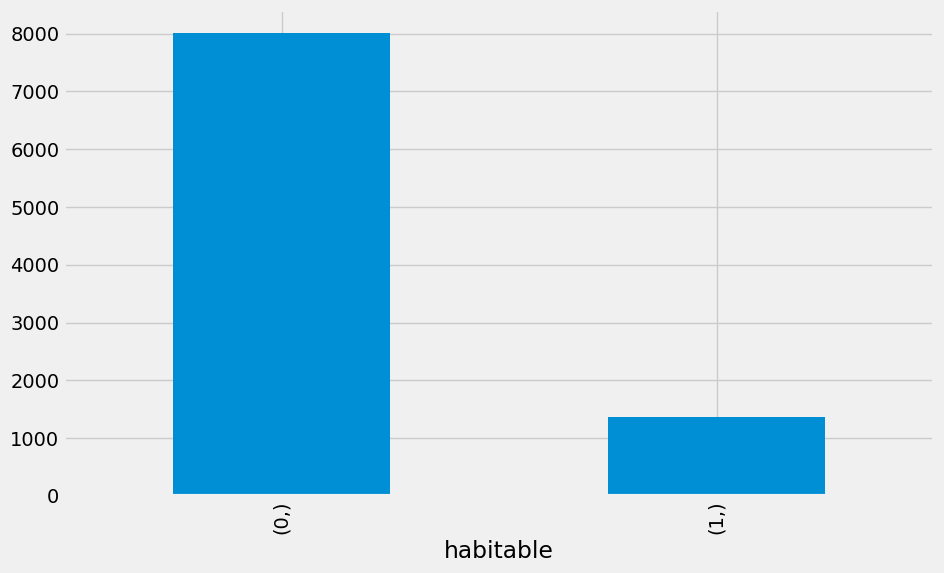

In [5]:
y_train.value_counts().plot(kind='bar');

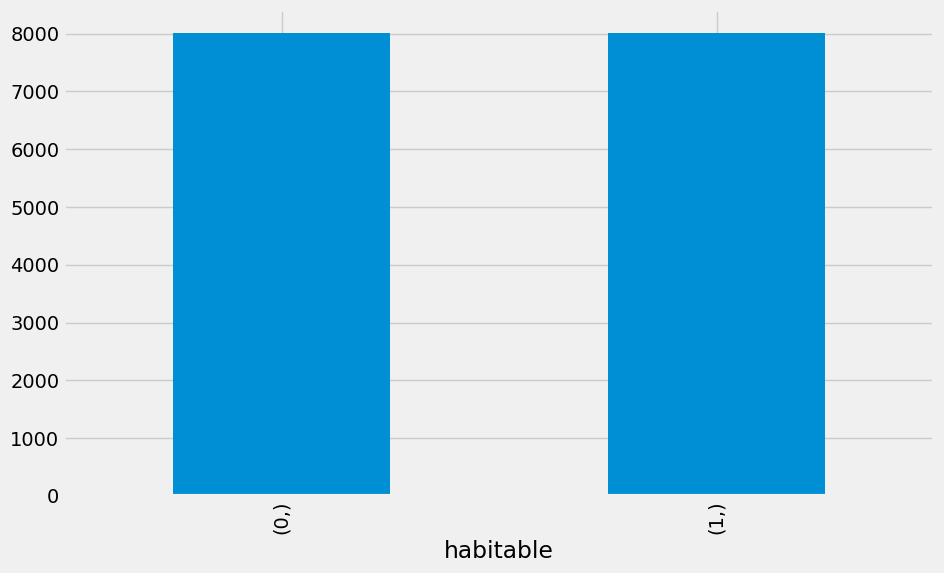

In [6]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
ov_train_x,ov_train_y = model.fit_resample(x_train, y_train)

ov_train_y.value_counts().plot(kind='bar');

In [17]:
model = SMOTE()
ov_x,ov_y = model.fit_resample(x, y)

ov_train_x, ov_test_x, ov_train_y, ov_test_y = train_test_split(ov_x, ov_y, test_size=0.33, random_state=42)

# Decision Tree

Validation accuracy of Decision Tree is 0.9955880499180638

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4004
           1       0.99      1.00      1.00      3929

    accuracy                           1.00      7933
   macro avg       1.00      1.00      1.00      7933
weighted avg       1.00      1.00      1.00      7933



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

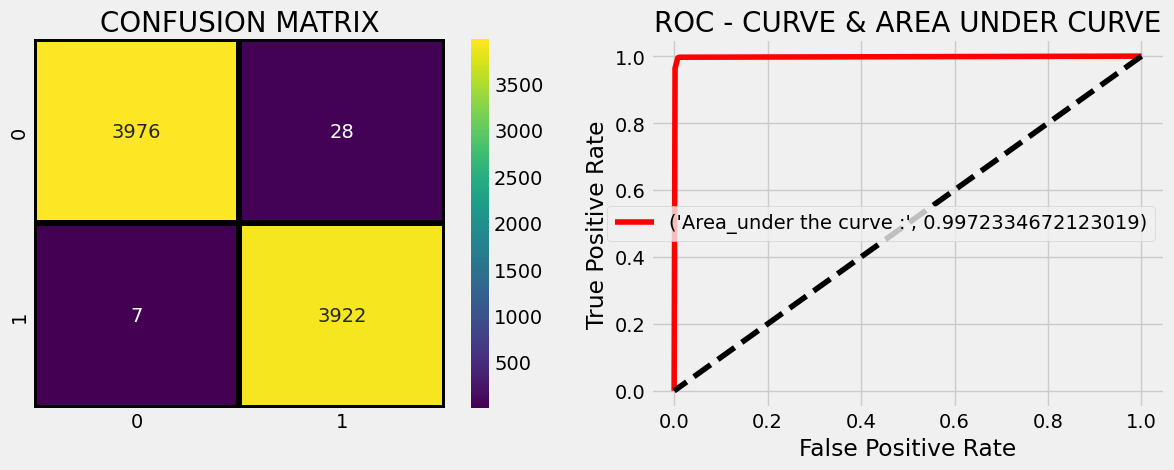

In [18]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)

ds_model.fit(ov_train_x,ov_train_y)

prediction=ds_model.predict(ov_test_x)

print('Validation accuracy of Decision Tree is', accuracy_score(prediction,ov_test_y))
print ("\nClassification report :\n",(classification_report(ov_test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(ov_test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

# #ROC curve and Area under the curve plotting
predicting_probabilites = ds_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

# kNN

Validation accuracy of kNN is 0.9176856170427329

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      4004
           1       0.86      0.99      0.92      3929

    accuracy                           0.92      7933
   macro avg       0.93      0.92      0.92      7933
weighted avg       0.93      0.92      0.92      7933



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

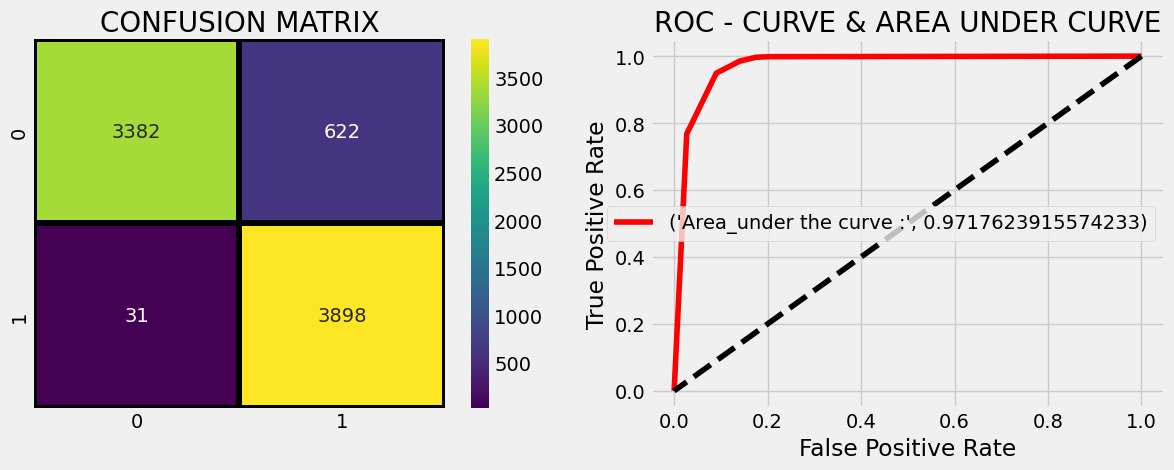

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model.fit(ov_train_x,ov_train_y)

prediction=knn_model.predict(ov_test_x)

print('Validation accuracy of kNN is', accuracy_score(prediction,ov_test_y))
print ("\nClassification report :\n",(classification_report(ov_test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(ov_test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

# Logistic Regression

Validation accuracy of Logistic Regression is 0.5047270893735031

Classification report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      4004
           1       0.00      0.00      0.00      3929

    accuracy                           0.50      7933
   macro avg       0.25      0.50      0.34      7933
weighted avg       0.25      0.50      0.34      7933



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

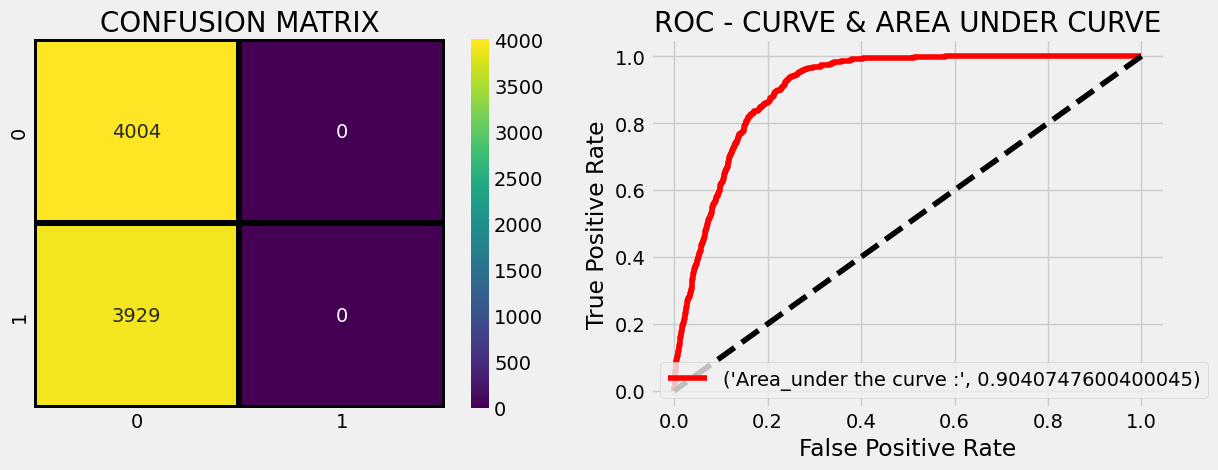

In [20]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight={0:100, 1:1})

lr_model.fit(ov_train_x,ov_train_y)

prediction=lr_model.predict(ov_test_x)

print('Validation accuracy of Logistic Regression is', accuracy_score(prediction,ov_test_y))
print ("\nClassification report :\n",(classification_report(ov_test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(ov_test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = lr_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)